# Two Sample Tests of Centrality

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.graphics.api as smg

sns.set_style('whitegrid')

## Paired samples test

In [2]:
sales07 = np.array([13457, 42389, 25690, 17500, 21742])
sales08 = np.array([15473, 41989, 28795, 19300, 22317])

In [3]:
a = sales07
b = sales08
alternative = 'less'
# two sample test
t, p_val = stats.ttest_rel(a=a,b=b,alternative=alternative)
print(t)
print(p_val)

-2.33864593955079
0.039748017781804805


In [5]:
# use difference and 1 sample test
d = a - b
t, p_val = stats.ttest_1samp(a=d,popmean=0, alternative=alternative)
print(t)
print(p_val)

-2.33864593955079
0.039748017781804805


## Independent 2-sample test about mean (2-sample $t$ test)

In [6]:
# Let's start by creating a DataFrame for the data in the slides
sales = pd.DataFrame({'Year':([2007] * 5 + [2008] * 6), 'Sales':[21742,13457,25690,17500,42389,15473,41989,28795,19300,22317,27315]})

In [7]:
sales

,Year,Sales
0,2007,21742
1,2007,13457
2,2007,25690
3,2007,17500
4,2007,42389
5,2008,15473
6,2008,41989
7,2008,28795
8,2008,19300
9,2008,22317


In [10]:
# without pooled variance
a = sales[sales['Year']==2007]['Sales']
b = sales[sales['Year']==2008]['Sales']
equal_var = False
alternative = 'less'

t, p_val = stats.ttest_ind(a=a, b=b, equal_var=equal_var, alternative=alternative)
print(t)
print(p_val)

-0.2721374904816976
0.3962607997371378


In [11]:
# with pooled variance
# without pooled variance
a = sales[sales['Year']==2007]['Sales']
b = sales[sales['Year']==2008]['Sales']
equal_var = True
alternative = 'less'

t, p_val = stats.ttest_ind(a=a, b=b, equal_var=equal_var, alternative=alternative)
print(t)
print(p_val)

-0.2771230021354742
0.39397274881449706


<Axes: ylabel='Density'>

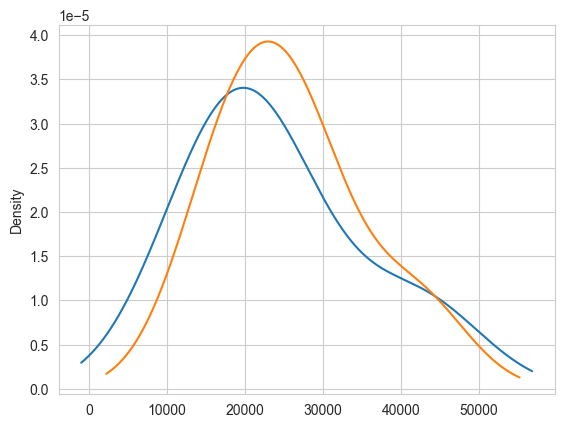

In [13]:
a.plot(kind='kde')
b.plot(kind='kde')

## Independent 2-sample test about median (Mann-Whitney U test)

In [14]:
x = a
y = b
U, pval = stats.mannwhitneyu(x=x, y=y, alternative=alternative)
print(U)
print(pval)

12.0
0.33116883116883117


--- 
# Progress Check

In [17]:
dogs = pd.DataFrame({'Group':([1] * 7 + [2] * 7),
                     'Time':[114, 203, 217,254,256,284,296,4,7,24,25,48,71,294]})
dogs

,Group,Time
0,1,114
1,1,203
2,1,217
3,1,254
4,1,256
5,1,284
6,1,296
7,2,4
8,2,7
9,2,24


In [18]:
x = dogs[dogs['Group']==1]['Time']
y = dogs[dogs['Group']==2]['Time']
alternative = 'two-sided'
U, pval = stats.mannwhitneyu(x=x, y=y, alternative=alternative)
print(U)
print(pval)

43.0
0.01748251748251748
